In [6]:
import pandas as pd
import altair as alt
from vega_datasets import data as vega_data
alt.renderers.enable('notebook')
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [12]:
rankings_file_path = "../../data/Daily_Ranking.csv"

In [13]:
df = pd.read_csv(rankings_file_path)

Joining the main rankings dataset with the Country names dataset

In [14]:
df_countries = pd.read_json("countries.json")
df_countries = df_countries.transpose()
df_countries = df_countries.drop(columns=['continent', 'capital', 'languages', 'native', 'phone', 'currency'])
df_countries = df_countries.rename(columns={'name':'Country'})
df_countries.head()
df['Region'] = df['Region'].str.upper()
df = df.merge(df_countries, how='inner', left_on='Region', right_index=True)
df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,Country
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,EC,Ecuador
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,EC,Ecuador
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,EC,Ecuador
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,EC,Ecuador
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,EC,Ecuador


Country name to ID mapping: https://en.wikipedia.org/wiki/ISO_3166-1_numeric

In [18]:
id_mapping_file = "country_id_mapping.csv"

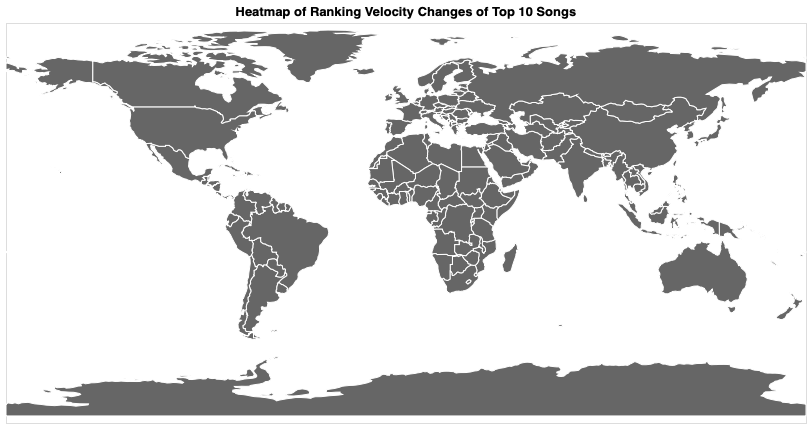

In [11]:
data = None

map_source = alt.topo_feature(vega_data.world_110m.url, 'countries')

base_chart = alt.Chart(map_source, width=800, height=400).mark_geoshape(
    fill='#666666',
    stroke='white'
).project('equirectangular')


(base_chart).properties(title='Heatmap of Ranking Velocity Changes of Top 10 Songs')